# Tarea Mínimos Cuadrados
Gary Defas

## Ejercicio 2

In [22]:
xs = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 29, 21, 28, 28, 26, 30, 24]

ys = [3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]


### Ecuacion grado 1

In [23]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [24]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-28 22:39:35][INFO] Se ajustarán 2 parámetros.
[01-28 22:39:35][INFO] 
[[546.          20.          64.8       ]
 [  0.          -4.6959707   -2.28494505]]


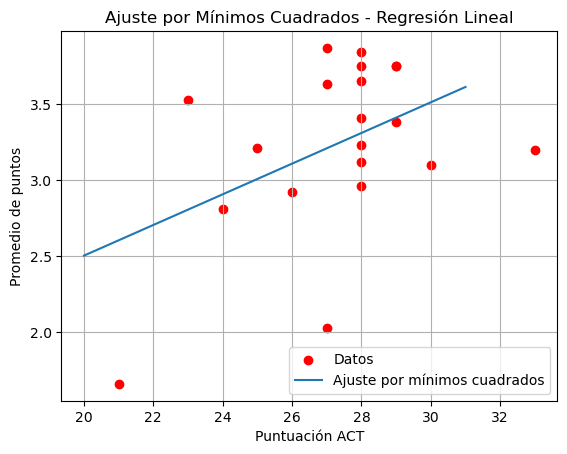

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def f_lineal(x):
    return pars[0] * x + pars[1]

x = np.linspace(20,31, 100)
y = f_lineal(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Lineal')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_lineal(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_lineal(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 28, y_real = 3.84, y_ajustado = 3.31, error = 0.53
x = 25, y_real = 3.21, y_ajustado = 3.01, error = 0.20
x = 28, y_real = 3.23, y_ajustado = 3.31, error = 0.08
x = 27, y_real = 3.63, y_ajustado = 3.21, error = 0.42
x = 28, y_real = 3.75, y_ajustado = 3.31, error = 0.44
x = 33, y_real = 3.2, y_ajustado = 3.81, error = 0.61
x = 28, y_real = 3.41, y_ajustado = 3.31, error = 0.10
x = 29, y_real = 3.38, y_ajustado = 3.41, error = 0.03
x = 23, y_real = 3.53, y_ajustado = 2.81, error = 0.72
x = 27, y_real = 2.03, y_ajustado = 3.21, error = 1.18
x = 29, y_real = 3.75, y_ajustado = 3.41, error = 0.34
x = 28, y_real = 3.65, y_ajustado = 3.31, error = 0.34
x = 27, y_real = 3.87, y_ajustado = 3.21, error = 0.66
x = 29, y_real = 3.75, y_ajustado = 3.41, error = 0.34
x = 21, y_real = 1.66, y_ajustado = 2.60, error = 0.94
x = 28, y_real = 3.12, y_ajustado = 3.31, error = 0.19
x = 28, y_real = 2.96, y_ajustado = 3.31, error = 0.35
x = 26, y_real = 2.92, y_ajustado = 3.11, error = 0.19
x = 30, y_r

### Ecuacion grado 2

In [27]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    c_2 = sum(xi**2 for xi in xs)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_2, c_1, c_0, c_ind)


def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    c_2 = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        c_2 += xi*xi*xi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * xi * yi

        c_2 += xi*xi*xi * xi

        # coeficiente del parámetro 1
        c_1 += xi * xi * xi

        # coeficiente del parámetro 0
        c_0 += xi * xi

    return (c_2, c_1, c_0, c_ind)



In [28]:
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

[01-28 22:39:35][INFO] Se ajustarán 3 parámetros.
[01-28 22:39:35][INFO] 
[[ 1.50340000e+04  5.46000000e+02  2.00000000e+01  6.48000000e+01]
 [ 0.00000000e+00 -1.20278303e+02 -9.10176932e+00 -1.65597326e+01]
 [ 0.00000000e+00 -6.49841745e+03 -4.88652654e+02 -9.38344599e+02]]
[01-28 22:39:35][INFO] 
[[ 1.50340000e+04  5.46000000e+02  2.00000000e+01  6.48000000e+01]
 [ 0.00000000e+00 -1.20278303e+02 -9.10176932e+00 -1.65597326e+01]
 [ 0.00000000e+00  0.00000000e+00  3.09935275e+00 -4.36524296e+01]]


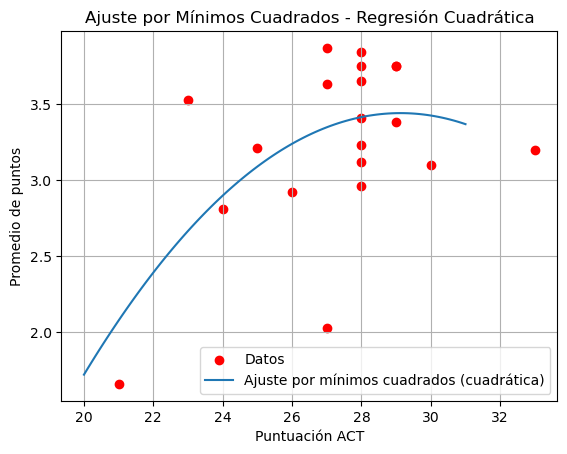

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def f_cuadratica(x):
    return pars[0] * x**2 + pars[1] * x + pars[2]
x = np.linspace(20,31, 100)
y = f_cuadratica(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados (cuadrática)')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Cuadrática')
plt.legend()
plt.grid()
plt.show()

In [30]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_cuadratica(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_cuadratica(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 28, y_real = 3.84, y_ajustado = 3.42, error = 0.42
x = 25, y_real = 3.21, y_ajustado = 3.09, error = 0.12
x = 28, y_real = 3.23, y_ajustado = 3.42, error = 0.19
x = 27, y_real = 3.63, y_ajustado = 3.35, error = 0.28
x = 28, y_real = 3.75, y_ajustado = 3.42, error = 0.33
x = 33, y_real = 3.2, y_ajustado = 3.13, error = 0.07
x = 28, y_real = 3.41, y_ajustado = 3.42, error = 0.01
x = 29, y_real = 3.38, y_ajustado = 3.44, error = 0.06
x = 23, y_real = 3.53, y_ajustado = 2.67, error = 0.86
x = 27, y_real = 2.03, y_ajustado = 3.35, error = 1.32
x = 29, y_real = 3.75, y_ajustado = 3.44, error = 0.31
x = 28, y_real = 3.65, y_ajustado = 3.42, error = 0.23
x = 27, y_real = 3.87, y_ajustado = 3.35, error = 0.52
x = 29, y_real = 3.75, y_ajustado = 3.44, error = 0.31
x = 21, y_real = 1.66, y_ajustado = 2.08, error = 0.42
x = 28, y_real = 3.12, y_ajustado = 3.42, error = 0.30
x = 28, y_real = 2.96, y_ajustado = 3.42, error = 0.46
x = 26, y_real = 2.92, y_ajustado = 3.24, error = 0.32
x = 30, y_r

### Ecuacion grado 3

In [31]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_3(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    c_3 = sum(xi**3 for xi in xs)

    c_2 = sum(xi**2 for xi in xs)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_3, c_2, c_1, c_0, c_ind)


def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0

    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        c_3 += xi*xi*xi*xi

        c_2 += xi*xi*xi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_3, c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0

    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * xi * yi

        c_3 += xi*xi*xi*xi*xi

        c_2 += xi*xi*xi*xi

        # coeficiente del parámetro 1
        c_1 += xi*xi*xi

        # coeficiente del parámetro 0
        c_0 += xi*xi

    return (c_3, c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_3 = 0
    c_2 = 0
    c_1 = 0
    c_0 = 0
    c_ind = 0

    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * xi * xi* yi

        c_3 += xi*xi*xi*xi*xi*xi

        c_2 += xi*xi*xi*xi*xi

        # coeficiente del parámetro 1
        c_1 += xi*xi*xi*xi

        # coeficiente del parámetro 0
        c_0 += xi*xi*xi

    return (c_3, c_2, c_1, c_0, c_ind)


In [32]:
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2, der_parcial_3])

[01-28 22:39:35][INFO] Se ajustarán 4 parámetros.
[01-28 22:39:35][INFO] 
[[ 4.17270000e+05  1.50340000e+04  5.46000000e+02  2.00000000e+01
   6.48000000e+01]
 [ 0.00000000e+00 -1.71548448e+05 -1.27286591e+04 -7.16866633e+02
  -1.67775789e+03]
 [ 0.00000000e+00 -3.13500120e+03 -2.34134273e+02 -1.32723177e+01
  -3.00723093e+01]
 [ 0.00000000e+00 -7.11817349e+06 -5.24788370e+05 -2.93661308e+04
  -7.08550536e+04]]
[01-28 22:39:35][INFO] 
[[ 4.17270000e+05  1.50340000e+04  5.46000000e+02  2.00000000e+01
   6.48000000e+01]
 [ 0.00000000e+00 -3.13500120e+03 -2.34134273e+02 -1.32723177e+01
  -3.00723093e+01]
 [ 0.00000000e+00  0.00000000e+00  8.32566195e+01  9.39959585e+00
  -3.21897856e+01]
 [ 0.00000000e+00  0.00000000e+00  6.82494255e+03  7.69315373e+02
  -2.57440528e+03]]
[01-28 22:39:35][INFO] 
[[ 4.17270000e+05  1.50340000e+04  5.46000000e+02  2.00000000e+01
   6.48000000e+01]
 [ 0.00000000e+00 -3.13500120e+03 -2.34134273e+02 -1.32723177e+01
  -3.00723093e+01]
 [ 0.00000000e+00  0.00000

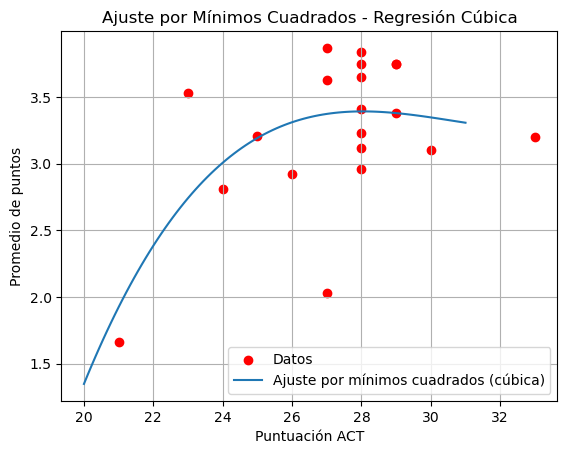

In [33]:
def f_cubica(x):
    return pars[0] * x**3 + pars[1] * x**2 + pars[2] * x + pars[3]

x = np.linspace(20,31, 100)
y = f_cubica(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados (cúbica)')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Cúbica')
plt.legend()
plt.grid()
plt.show()

In [34]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_cubica(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_cubica(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 28, y_real = 3.84, y_ajustado = 3.39, error = 0.45
x = 25, y_real = 3.21, y_ajustado = 3.19, error = 0.02
x = 28, y_real = 3.23, y_ajustado = 3.39, error = 0.16
x = 27, y_real = 3.63, y_ajustado = 3.37, error = 0.26
x = 28, y_real = 3.75, y_ajustado = 3.39, error = 0.36
x = 33, y_real = 3.2, y_ajustado = 3.25, error = 0.05
x = 28, y_real = 3.41, y_ajustado = 3.39, error = 0.02
x = 29, y_real = 3.38, y_ajustado = 3.38, error = 0.00
x = 23, y_real = 3.53, y_ajustado = 2.74, error = 0.79
x = 27, y_real = 2.03, y_ajustado = 3.37, error = 1.34
x = 29, y_real = 3.75, y_ajustado = 3.38, error = 0.37
x = 28, y_real = 3.65, y_ajustado = 3.39, error = 0.26
x = 27, y_real = 3.87, y_ajustado = 3.37, error = 0.50
x = 29, y_real = 3.75, y_ajustado = 3.38, error = 0.37
x = 21, y_real = 1.66, y_ajustado = 1.92, error = 0.26
x = 28, y_real = 3.12, y_ajustado = 3.39, error = 0.27
x = 28, y_real = 2.96, y_ajustado = 3.39, error = 0.43
x = 26, y_real = 2.92, y_ajustado = 3.31, error = 0.39
x = 30, y_r

### Ecuacion $be^{ax}$

In [35]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [36]:
import numpy as np

Y = np.log(ys)

pars = ajustar_min_cuadrados(xs, Y, gradiente=[der_parcial_0, der_parcial_1])

a = pars[0]

B = pars[1]
b = np.exp(B)

print(f"y = {b:.4f} * e^({a:.4f} * x)")

[01-28 22:39:36][INFO] Se ajustarán 2 parámetros.
[01-28 22:39:36][INFO] 
[[ 5.46000000e+02  2.00000000e+01  2.31297898e+01]
 [ 0.00000000e+00 -4.69597070e+00 -2.79495711e-01]]
y = 1.0613 * e^(0.0402 * x)


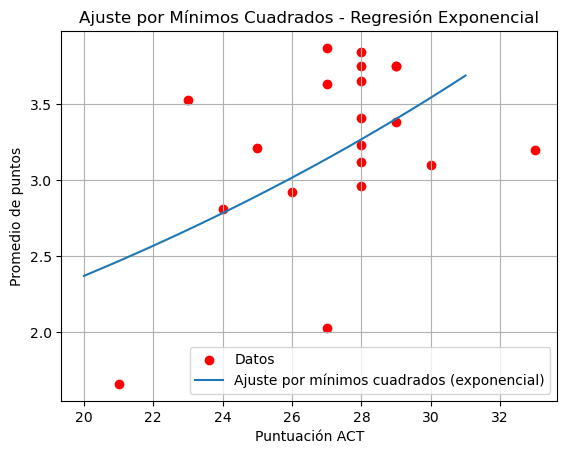

In [37]:
def f_exponencial(x):
    return b * np.exp(a * x)

x = np.linspace(20,31, 100)
y = f_exponencial(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados (exponencial)')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Exponencial')
plt.legend()
plt.grid()
plt.show()


In [38]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_exponencial(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_exponencial(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 28, y_real = 3.84, y_ajustado = 3.27, error = 0.57
x = 25, y_real = 3.21, y_ajustado = 2.90, error = 0.31
x = 28, y_real = 3.23, y_ajustado = 3.27, error = 0.04
x = 27, y_real = 3.63, y_ajustado = 3.14, error = 0.49
x = 28, y_real = 3.75, y_ajustado = 3.27, error = 0.48
x = 33, y_real = 3.2, y_ajustado = 4.00, error = 0.80
x = 28, y_real = 3.41, y_ajustado = 3.27, error = 0.14
x = 29, y_real = 3.38, y_ajustado = 3.40, error = 0.02
x = 23, y_real = 3.53, y_ajustado = 2.67, error = 0.86
x = 27, y_real = 2.03, y_ajustado = 3.14, error = 1.11
x = 29, y_real = 3.75, y_ajustado = 3.40, error = 0.35
x = 28, y_real = 3.65, y_ajustado = 3.27, error = 0.38
x = 27, y_real = 3.87, y_ajustado = 3.14, error = 0.73
x = 29, y_real = 3.75, y_ajustado = 3.40, error = 0.35
x = 21, y_real = 1.66, y_ajustado = 2.47, error = 0.81
x = 28, y_real = 3.12, y_ajustado = 3.27, error = 0.15
x = 28, y_real = 2.96, y_ajustado = 3.27, error = 0.31
x = 26, y_real = 2.92, y_ajustado = 3.02, error = 0.10
x = 30, y_r

### Ecuacion forma $bx^{a}$

In [39]:
import numpy as np

X = np.log(xs)
Y = np.log(ys)

pars = ajustar_min_cuadrados(X, Y, gradiente=[der_parcial_0, der_parcial_1])

B = pars[1]
b = np.exp(B)

print(f"y = {b:.4f} * x^{pars[1]:.4f}")

[01-28 22:39:36][INFO] Se ajustarán 2 parámetros.
[01-28 22:39:36][INFO] 
[[ 6.60475774e+01  2.00000000e+01  2.31297898e+01]
 [ 0.00000000e+00 -5.60746937e-02  1.43065854e-01]]
y = 0.0780 * x^-2.5513


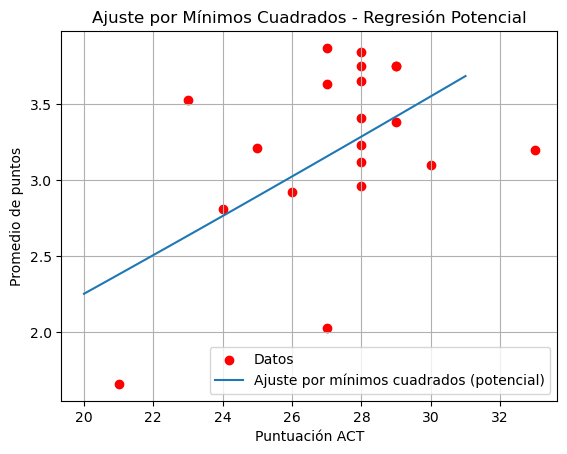

In [40]:
def f_potencial(x):
    return b * x**pars[0]

x = np.linspace(20,31, 100)
y = f_potencial(x)
plt.scatter(xs, ys, color='red', label='Datos')
plt.plot(x, y, label='Ajuste por mínimos cuadrados (potencial)')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste por Mínimos Cuadrados - Regresión Potencial')
plt.legend()
plt.grid()
plt.show()

In [41]:
# Calcular el error entre los puntos dados y la ecuación ajustada
errores = []
for xi, yi in zip(xs, ys):
    y_ajustado = f_potencial(xi)
    error = abs(yi - y_ajustado)
    errores.append(error)
    print(f"x = {xi}, y_real = {yi}, y_ajustado = {y_ajustado:.2f}, error = {error:.2f}")

# Error absoluto medio (MAE)
mae = sum(errores) / len(errores)
print(f"\nError Absoluto Medio (MAE): {mae:.4f}")

# Error cuadrático medio (MSE)
mse = sum((yi - f_potencial(xi))**2 for xi, yi in zip(xs, ys)) / len(xs)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

x = 28, y_real = 3.84, y_ajustado = 3.29, error = 0.55
x = 25, y_real = 3.21, y_ajustado = 2.89, error = 0.32
x = 28, y_real = 3.23, y_ajustado = 3.29, error = 0.06
x = 27, y_real = 3.63, y_ajustado = 3.16, error = 0.47
x = 28, y_real = 3.75, y_ajustado = 3.29, error = 0.46
x = 33, y_real = 3.2, y_ajustado = 3.95, error = 0.75
x = 28, y_real = 3.41, y_ajustado = 3.29, error = 0.12
x = 29, y_real = 3.38, y_ajustado = 3.42, error = 0.04
x = 23, y_real = 3.53, y_ajustado = 2.64, error = 0.89
x = 27, y_real = 2.03, y_ajustado = 3.16, error = 1.13
x = 29, y_real = 3.75, y_ajustado = 3.42, error = 0.33
x = 28, y_real = 3.65, y_ajustado = 3.29, error = 0.36
x = 27, y_real = 3.87, y_ajustado = 3.16, error = 0.71
x = 29, y_real = 3.75, y_ajustado = 3.42, error = 0.33
x = 21, y_real = 1.66, y_ajustado = 2.38, error = 0.72
x = 28, y_real = 3.12, y_ajustado = 3.29, error = 0.17
x = 28, y_real = 2.96, y_ajustado = 3.29, error = 0.33
x = 26, y_real = 2.92, y_ajustado = 3.02, error = 0.10
x = 30, y_r